### 1- Read the file

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv("history.csv")

In [2]:
df.head(5)

,Hour,Temperature,Load
0,1,43.72,1384494.0
1,2,42.72,1392822.0
2,3,41.84,1407887.0
3,4,41.04,1438658.0
4,5,40.56,1484046.0


In [3]:
df.tail(5)

,Hour,Temperature,Load
35059,20,64.12,1409813.0
35060,21,62.88,1309493.0
35061,22,61.80,1217706.0
35062,23,61.16,1127940.0
35063,24,60.80,1047116.0


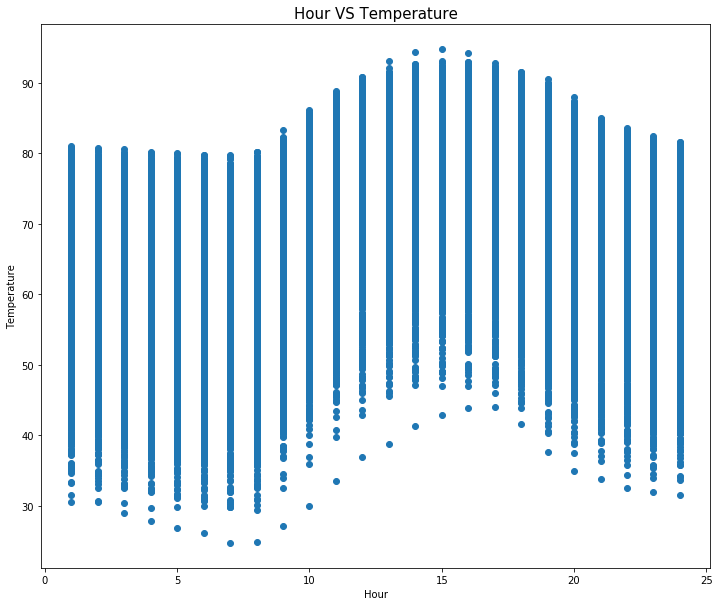

In [23]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(12,10))
plt.scatter(df['Hour'],df['Temperature'])
plt.title('Hour VS Temperature',fontsize=15)
plt.ylabel('Temperature')
plt.xlabel('Hour')
plt.show()

### 2 - Create train and test set

In [5]:
X=df.iloc[:,0:2].values
Y=df.iloc[:,2].values

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=1/3,random_state=0)

### 3 - Error rate for different k values

In [7]:
# import required packages

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
rmse_val = [] # to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(xtrain, ytrain)  # fit the model
    pred=model.predict(xtest) # make prediction on test set
    error = sqrt(mean_squared_error(ytest,pred)) # calculate rmse
    rmse_val.append(error) # store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 176930.55780715542
RMSE value for k=  2 is: 154649.52453350995
RMSE value for k=  3 is: 145452.31486904953
RMSE value for k=  4 is: 140738.43918351285
RMSE value for k=  5 is: 137761.08952254642
RMSE value for k=  6 is: 135807.78784339133
RMSE value for k=  7 is: 134538.5126487041
RMSE value for k=  8 is: 133490.6458304449
RMSE value for k=  9 is: 132387.30476327537
RMSE value for k=  10 is: 131748.23270456272
RMSE value for k=  11 is: 131476.919552738
RMSE value for k=  12 is: 130848.63630795322
RMSE value for k=  13 is: 130315.91000882782
RMSE value for k=  14 is: 129966.41437764531
RMSE value for k=  15 is: 129517.80237415918
RMSE value for k=  16 is: 129234.90971591802
RMSE value for k=  17 is: 129004.49398016457
RMSE value for k=  18 is: 128884.85599026046
RMSE value for k=  19 is: 128605.54104102725
RMSE value for k=  20 is: 128456.78109217172
RMSE value for k=  21 is: 128222.69609726859
RMSE value for k=  22 is: 128152.68317887488
RMSE value for k=  23 i

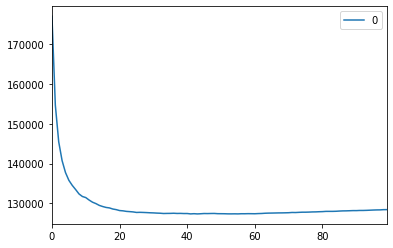

In [9]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [10]:
np.where(curve[0]==min(curve[0])) # Find the lowest value for K from the plot above

(array([43], dtype=int64),)

### 4 - Predictions on the test dataset

In [11]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(44)
KNR.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=44, p=2,
                    weights='uniform')

In [12]:
predicted=KNR.predict(xtest)

In [13]:
predicted

array([ 716779.95454545, 1922161.22727273,  799157.54545455, ...,
       1535110.        , 1666994.22727273, 1313737.18181818])

In [14]:
ytest.shape

(11688,)

In [15]:
X.shape

(35064, 2)

In [16]:
len(predicted)

11688

In [17]:
ytest

array([ 646544., 2146453.,  856007., ..., 1477031., 1888273., 1117868.])

### 5- Forecasting

In [18]:
df1=pd.read_csv("fcst.csv")

In [19]:
dfnew=df1.iloc[:,0:2]

In [20]:
newpred=KNR.predict(dfnew)

In [21]:
newpred=newpred.astype(int)

In [22]:
np.savetxt('array.csv', newpred, delimiter=',', fmt='%d')